## <font color='blue'>SML Assignment 2: Multiple Regression </font>
### Kaustubh Raykar
PRN : 21070126048 <br> 
<break> AIML A3 
 

<font color='teal'>HOUSING DATASET</font>

### <font color='teal'>Step 1 : Importing Libraries </font>

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### <font color='teal'> Step 2: Upload Dataset </font>

In [183]:
df=pd.read_csv("/content/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### <font color='teal'>Step 3: Data Description and Encoding</font>

In [184]:
#Applying encoding
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()

In [185]:
# Encode labels in column 'mainroad'
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished


In [186]:
# Encode labels 
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['basement'] = label_encoder.fit_transform(df['basement'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [187]:
df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])
df

# 0 - furnished
# 1 - semi-furnished
# 2 - unfurnished

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [188]:
# Checking head of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [189]:
# Checking the shape of df
df.shape

(545, 13)

In [190]:
# Checking the descriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [191]:
#checking the data description
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


### <font color='teal'>Step 4 : Data Cleaning </font>

In [192]:
#Check for null values
df.isnull().sum()
#there are no null/missing values 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [193]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

### <font color='teal'>Step 5: Data Visualisation , EDA </font> 

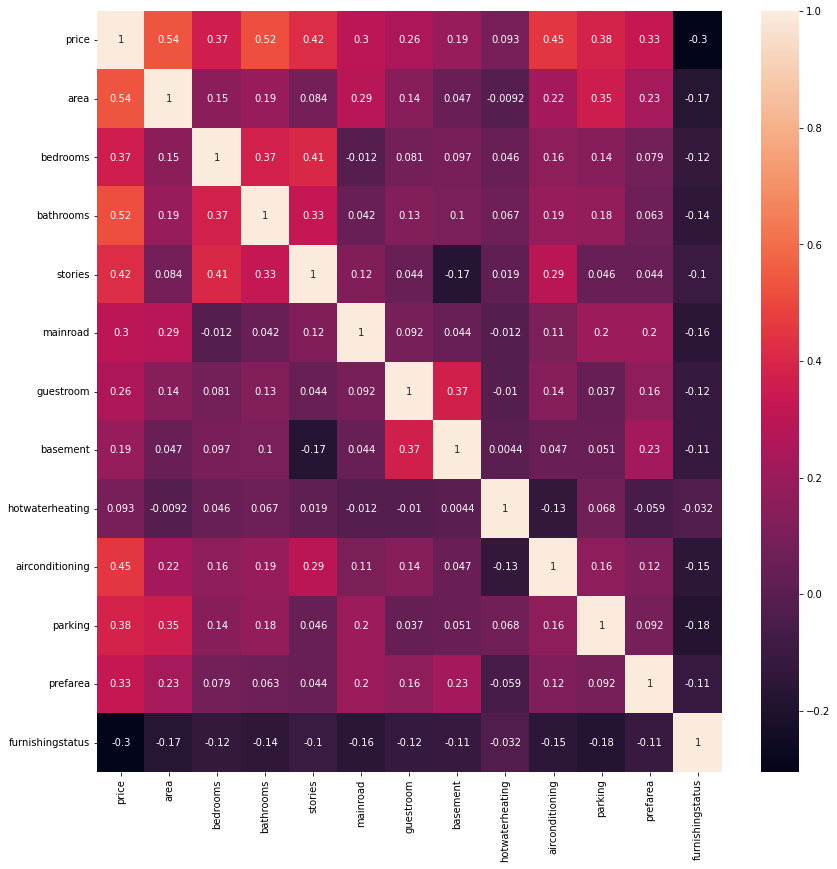

In [194]:
fig, ax = plt.subplots(figsize=(14,14)) 
sns.heatmap(df.corr(),annot = True)

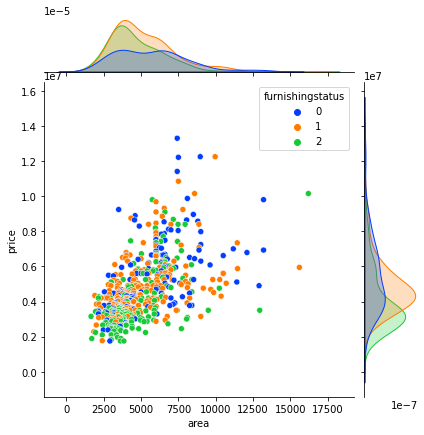

In [195]:
sns.jointplot(data=df, x="area", y="price", hue="furnishingstatus",palette = 'bright')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


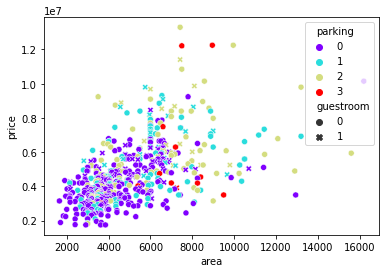

In [196]:
sns.scatterplot(df["area"], df["price"], hue=df["parking"], style=df['guestroom'],palette = "rainbow")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


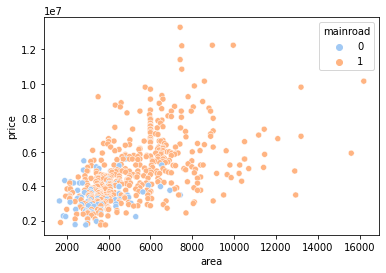

In [197]:
sns.scatterplot(df["area"], df["price"], hue=df["mainroad"],palette = "pastel")
plt.show()

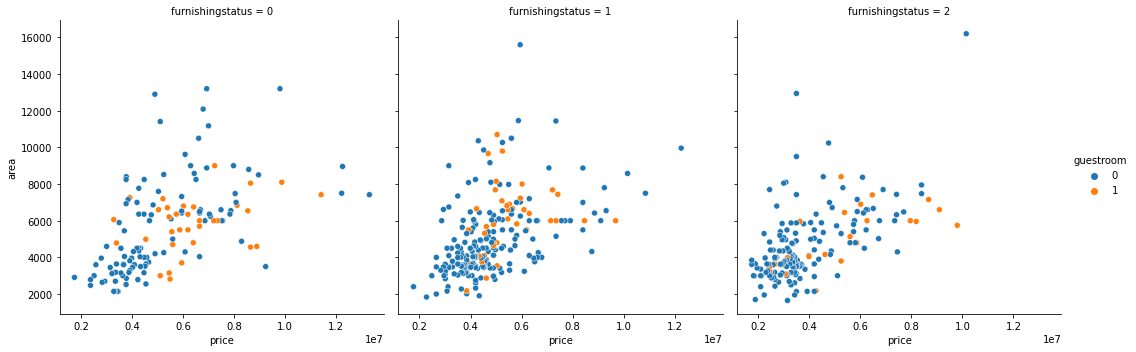

In [198]:
sns.relplot(
    data=df, x="price", y="area",
    col="furnishingstatus", hue="guestroom",
)

In [199]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### <font color='teal'>Step 7: Splitting the data </font>

In [200]:
#x: independent y: dependent
x = df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y = df['price']

In [201]:
# x is independent feature 
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [202]:
# y is dependent feature 
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### <font color='teal'>Step 8 : Split x and y into training and test data set  </font>

In [203]:
#splitting the data in testing and training dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size = 0.2, random_state = 12
)

In [204]:
#x in train testing values in x and y 
#y in train testing values in x and y 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 12)
(109, 12)
(436,)
(109,)


### <font color='teal'>Step 9: Scaling the data  </font>

In [205]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()  #StandardScaler: transforming data into particular size
#x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
#x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [206]:
#x in train testing values in x and y 
#y in train testing values in x and y 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 12)
(109, 12)
(436,)
(109,)


### <font color='teal'>Step 10: Import Regression Model  </font>

In [207]:
#fitting the data into the model
#create the model instance
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [208]:
#accuracy
mlr.score(x_train, y_train)

0.6501716797053578

In [209]:
#accuracy
mlr.score(x_test, y_test)

0.7246609398021734

### <font color='teal'>Step 11: Calculating slope and intercept for each factor  </font>

In [210]:
#model equation
print("Intercept: ", mlr.intercept_)
print("Coefficients: ")
list(zip(x, mlr.coef_))

Intercept:  502258.74141358025
Coefficients: 


[('area', 222.41271177955767),
 ('bedrooms', 113574.43546379649),
 ('bathrooms', 813331.5786976352),
 ('stories', 467348.5404731219),
 ('mainroad', 381404.2946666891),
 ('guestroom', 472352.84768597595),
 ('basement', 302431.6627455462),
 ('hotwaterheating', 1021601.4179976879),
 ('airconditioning', 842621.5174165794),
 ('parking', 228050.62874560902),
 ('prefarea', 528097.0767752184),
 ('furnishingstatus', -228726.74398788757)]

### <font color='teal'>Step 12: Predicting Values </font>

In [211]:
#Prediction of test set
y_pred_mlr = mlr.predict(x_test)
#predicted values
print("Prediction for test set:{}".format(y_pred_mlr))

Prediction for test set:[5044036.12146487 3371988.0496655  5819936.06548105 5178520.76992238
 4894046.89553338 6980390.20618904 2670368.5666494  6930621.51088423
 5296331.5817033  5842080.65607399 4473955.86429059 3739062.74251273
 7002947.32102297 7572489.03595826 3061312.63778014 4444935.88613103
 7843791.72983743 5039931.36831411 4441902.20458413 3880361.16777741
 6521215.67067494 6668814.70586545 9153743.85068458 4117185.34141732
 5662698.47710452 4926717.98702026 4555979.57362845 3646616.41890544
 3829564.59321317 3634837.49184675 4245618.3836221  4375498.61617406
 5229805.47200164 3912333.94482799 3029522.09879963 4359239.54304868
 2641310.96166184 5501698.36908181 4640417.34369324 5924666.68483171
 5029623.69055809 3145127.08365035 4041494.40525828 3522886.46376994
 6374423.28090043 3222631.04877269 4580852.94634391 6440087.96187757
 3260044.09860128 3061162.18005005 6460243.48461596 4917436.25126966
 3915626.97653834 3223379.50719291 3584018.19937922 2739172.55484484
 3360003.1

In [212]:
#actual vs predicted values by the model
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
298,4200000,5.044036e+06
372,3640000,3.371988e+06
14,9240000,5.819936e+06
168,5250000,5.178521e+06
200,4900000,4.894047e+06
...,...,...
12,9310000,6.726167e+06
397,3500000,3.931778e+06
544,1750000,3.371250e+06
537,1890000,2.893063e+06


### <font color='teal'> Step 13: Calculating R2E, MAE, MSE, RMSE </font>

In [213]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr) 
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)) 
print('R_squared: {:.2f}'.format(mlr.score(x,y)*100)) 
print('Mean Absolute Error:', meanAbErr) 
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R_squared: 67.31
Mean Absolute Error: 828404.4775206818
Mean Square Error: 1460126418767.4592
Root Mean Square Error: 1208356.9086852854


### <font color='teal'>Step 14: Plotting values using a scatter plot </font>

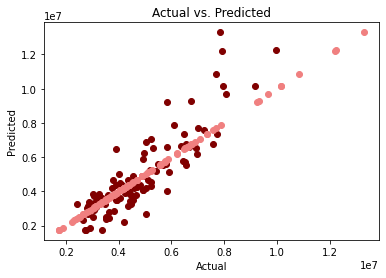

In [214]:
plt.scatter(y_pred_mlr,y_test, color = 'maroon')
plt.scatter(y_test,y_test, color = 'lightcoral')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

## THANK YOU 